In [1]:
# import keras
import sys
sys.path=['', '/home/rakhi/molecular_classifier-env/lib/python36.zip', '/home/rakhi/molecular_classifier-env/lib/python3.6', '/home/rakhi/molecular_classifier-env/lib/python3.6/lib-dynload', '/usr/lib/python3.6', '/home/rakhi/molecular_classifier-env/lib/python3.6/site-packages']

In [2]:
import pandas as pd
import numpy as np

In [3]:
mdata = pd.read_csv('data/musk_csv.csv')
# print(mdata)
mdata=mdata.reset_index().values
# print(type(mdata))
np.random.shuffle(mdata)
print(mdata)

[[3782 3783 'NON-MUSK-296' ... -249 83 0]
 [5534 5535 'NON-MUSK-j146' ... -188 3 0]
 [4505 4506 'NON-MUSK-j100' ... -263 -76 0]
 ...
 [3176 3177 'NON-MUSK-252' ... -162 131 0]
 [670 671 'MUSK-287' ... -150 112 1]
 [6120 6121 'NON-MUSK-j147' ... -308 -6 0]]


In [4]:
train_length=len(mdata)   #Taking full data,split the train and validation inside keras.fit
print(train_length)
train_data = mdata[:,4:]
print("Train data:")
print(train_data)

6598
Train data:
[[15 -198 -160 ... -249 83 0]
 [46 -195 -108 ... -188 3 0]
 [-1 -89 -7 ... -263 -76 0]
 ...
 [35 -195 -134 ... -162 131 0]
 [37 -139 -148 ... -150 112 1]
 [33 -192 -125 ... -308 -6 0]]


In [5]:
class_traindata=train_data[:,-1]
musk_traindata=sum(class_traindata)
nonmusk_traindata=train_length-musk_traindata
print('Musk record in train data: {}'.format(musk_traindata))
print('Non-Musk record in train data: {}'.format(nonmusk_traindata))
print(class_traindata)

Musk record in train data: 1017
Non-Musk record in train data: 5581
[0 0 0 ... 0 1 0]


In [6]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

model = Sequential()
model.add(Dense(40, input_dim=166, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(30, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])

In [7]:
# from sklearn.model_selection import train_test_split

def data_splitter(data):
    y_train=[]
    x_train=data[:,:-1]
    x_train=x_train.astype(float)
    for row in train_data:
        if (row[-1]==0):
            y_train0=[0.0,1.0]
        else:
            y_train0=[1.0,0.0]
        y_train.append(y_train0)
    y_train=np.array(y_train)
    return x_train,y_train
X,Y=data_splitter(train_data)
X_train=X
y_train=Y
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

history = model.fit(X_train,y_train, epochs=100,validation_split=0.2,batch_size=500)
model.save_weights('weights.h5')

Epoch 1/100
11/11 [==============================] - 0s 44ms/step - loss: 0.4294 - accuracy: 0.8124 - f1_m: 0.8122 - precision_m: 0.8122 - recall_m: 0.8122 - val_loss: 1.2712 - val_accuracy: 0.8295 - val_f1_m: 0.8226 - val_precision_m: 0.8226 - val_recall_m: 0.8226
Epoch 2/100
11/11 [==============================] - 0s 9ms/step - loss: 0.2841 - accuracy: 0.8964 - f1_m: 0.8969 - precision_m: 0.8969 - recall_m: 0.8969 - val_loss: 0.8376 - val_accuracy: 0.8318 - val_f1_m: 0.8250 - val_precision_m: 0.8250 - val_recall_m: 0.8250
Epoch 3/100
11/11 [==============================] - 0s 8ms/step - loss: 0.2256 - accuracy: 0.9199 - f1_m: 0.9198 - precision_m: 0.9198 - recall_m: 0.9198 - val_loss: 0.6304 - val_accuracy: 0.8356 - val_f1_m: 0.8295 - val_precision_m: 0.8295 - val_recall_m: 0.8295
Epoch 4/100
11/11 [==============================] - 0s 10ms/step - loss: 0.1913 - accuracy: 0.9278 - f1_m: 0.9294 - precision_m: 0.9294 - recall_m: 0.9294 - val_loss: 0.4412 - val_accuracy: 0.8470 - val_

Epoch 32/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0205 - accuracy: 0.9945 - f1_m: 0.9947 - precision_m: 0.9947 - recall_m: 0.9947 - val_loss: 0.0307 - val_accuracy: 0.9864 - val_f1_m: 0.9869 - val_precision_m: 0.9869 - val_recall_m: 0.9869
Epoch 33/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0190 - accuracy: 0.9958 - f1_m: 0.9959 - precision_m: 0.9959 - recall_m: 0.9959 - val_loss: 0.0461 - val_accuracy: 0.9848 - val_f1_m: 0.9848 - val_precision_m: 0.9848 - val_recall_m: 0.9848
Epoch 34/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0166 - accuracy: 0.9964 - f1_m: 0.9965 - precision_m: 0.9965 - recall_m: 0.9965 - val_loss: 0.0273 - val_accuracy: 0.9902 - val_f1_m: 0.9906 - val_precision_m: 0.9906 - val_recall_m: 0.9906
Epoch 35/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0161 - accuracy: 0.9966 - f1_m: 0.9964 - precision_m: 0.9964 - recall_m: 0.9964 - val_loss: 0.0248 - val_accuracy: 0.9909 - va

Epoch 63/100
11/11 [==============================] - 0s 9ms/step - loss: 0.0048 - accuracy: 0.9991 - f1_m: 0.9991 - precision_m: 0.9991 - recall_m: 0.9991 - val_loss: 0.0141 - val_accuracy: 0.9947 - val_f1_m: 0.9950 - val_precision_m: 0.9950 - val_recall_m: 0.9950
Epoch 64/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0068 - accuracy: 0.9989 - f1_m: 0.9988 - precision_m: 0.9988 - recall_m: 0.9988 - val_loss: 0.0182 - val_accuracy: 0.9947 - val_f1_m: 0.9953 - val_precision_m: 0.9953 - val_recall_m: 0.9953
Epoch 65/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0051 - accuracy: 0.9991 - f1_m: 0.9988 - precision_m: 0.9988 - recall_m: 0.9988 - val_loss: 0.0133 - val_accuracy: 0.9955 - val_f1_m: 0.9956 - val_precision_m: 0.9956 - val_recall_m: 0.9956
Epoch 66/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0052 - accuracy: 0.9987 - f1_m: 0.9987 - precision_m: 0.9987 - recall_m: 0.9987 - val_loss: 0.0134 - val_accuracy: 0.9962 - va

Epoch 94/100
11/11 [==============================] - 0s 11ms/step - loss: 0.0027 - accuracy: 0.9994 - f1_m: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - val_loss: 0.0063 - val_accuracy: 0.9992 - val_f1_m: 0.9993 - val_precision_m: 0.9993 - val_recall_m: 0.9993
Epoch 95/100
11/11 [==============================] - 0s 14ms/step - loss: 0.0023 - accuracy: 0.9994 - f1_m: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - val_loss: 0.0050 - val_accuracy: 0.9985 - val_f1_m: 0.9987 - val_precision_m: 0.9987 - val_recall_m: 0.9987
Epoch 96/100
11/11 [==============================] - 0s 12ms/step - loss: 0.0037 - accuracy: 0.9987 - f1_m: 0.9987 - precision_m: 0.9987 - recall_m: 0.9987 - val_loss: 0.0051 - val_accuracy: 0.9985 - val_f1_m: 0.9987 - val_precision_m: 0.9987 - val_recall_m: 0.9987
Epoch 97/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0033 - accuracy: 0.9994 - f1_m: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - val_loss: 0.0068 - val_accuracy: 0.9985 -

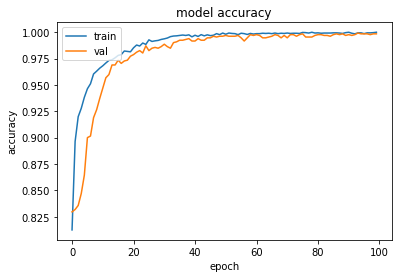

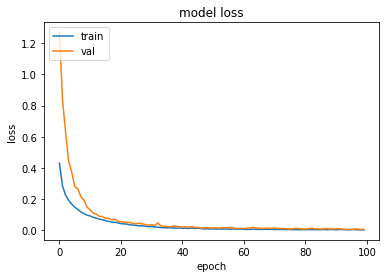

In [8]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [9]:
print('Validation accuracy   :   {}'.format(history.history['val_accuracy'][-1]))
print('Validation loss       :   {}'.format(history.history['val_loss'][-1]))
print('Validation precision  :   {}'.format(history.history['val_precision_m'][-1]))
print('Validation recall     :   {}'.format(history.history['val_recall_m'][-1]))
print('Validation f1 score   :   {}'.format(history.history['val_f1_m'][-1]))

Validation accuracy   :   0.9984848499298096
Validation loss       :   0.006099014077335596
Validation precision  :   0.9986667037010193
Validation recall     :   0.9986667037010193
Validation f1 score   :   0.9986665844917297
